<!-- 

author:  Michelle P. Kuchera
created: 18 Aug 2016
license: This code is released under the GNU GPL. Please feel free to use, modify, re-release at your will. You can not construct closed-source or proprietary software with this code. Please contact me if this is your desire.

-->
![Jupyter logo](http://jupyter.org/assets/main-logo.svg)

# Introduction to Jupyter Notebooks and Python

### Welcome to your (maybe) first **Jupyter notebook**!

In this class, we are learning to use the python language to solve problems in physics. So far, we have used an Integrated Development Enviroment (IDE) to write and execute python code. Today, we will use a Jupyter notebook to go through a brief overview of the python language. We will use both the IDE and the Jupyter notebooks to write python code this semester.

## Let's get started. 

From the Jupyter [documentation](http://jupyter.readthedocs.io/en/latest/index.html):

> First and foremost, the Jupyter Notebook is an interactive environment for writing and running code. The notebook is capable of running code in a wide range of languages. However, each notebook is associated with a single kernel.

In this class, we will use the Jupyter notebook to run Python code. You should therefore have this notebook opened in a Python kernel. Look at the top right of the browser window. If you see "Python 2" or "Python 3", this is a python notebook.

### Code cells allow you to enter and run code
You run code by holding `Shift` + `Enter`.

#### 1) Try this with the python code below.


In [1]:
a = 6
b = 2
c = a+b
print(c)

8


#### 2) Now, try to change a value of `a` or `b` above and re-execute the above cell.

### A *comment* is a non-code note within code. In python, a comment is preceded by a `#` for single-line comments.

Comments are useful as notes to yourself (the programmer), and/or notes to a user of your code. 

Below, the code from the first cell is reproduced with helpful comments.

#### 3) Run this code again and note that the addition of the comments did not change the execution of the code

In [2]:
# The following is simple python code, with comments, for adding two variables together
a = 6 # assigning the value of 6 to variable a
b = 2 # assigning the value 2 to the variable b
c = a+b # adding the variables a and b and storing the result in c
print(c) # printing the contents of c to the screen, right below the cell

8


### A *function* is a block of code that can be called at any point after it has been evaluated

In [3]:
def add(a,b): # a function is indicated by def. We named this function add. It takes two values as arguments
    c = a+b   # we add the two values that were passed into the function
    return c  # and return the result

In [4]:
answer = add(6,2)    # We store the result of add into a new variable answer
print(answer)
answer = add(5,100)  # We overwrote the variable answer with the new value
print(answer)        
test = add('h','i')  # The + sign concatenates other data types, such as characters, rather that adding them
print(test)

8
105
hi


### The python language itself does not contain all of the mathematics and visualization that we would be interested in for exploring physics.

### To take advantage of the math and visualization that is useful to us in this course, we can to use python packages. These contain *modules*, which are files that define *objects* and *functions* that we will use this semester.

Let's start with `SymPy`, a package for symbolic (rather than numeric) calculations.
#### 4) We must `import` the package of interest:

In [5]:
from sympy.interactive import printing # for pretty printing of variables, etc
printing.init_printing(use_latex='mathjax') # specifying what type of pretty printing (this will be LaTeX)
# now import the package and define a namespace, sym, that will precede the function calls from the sympy function
import sympy as sym 

#### 5) Now, let's use the package in a simple example

In [6]:
x = sym.symbols("x") # defining x as a variable
sym.Integral(1/x,x) # Calling the Integral function within sympy, this defines our integral

⌠     
⎮ 1   
⎮ ─ dx
⎮ x   
⌡     

In [7]:
sym.integrate(1/x,x) # Calling the itegrate function within sympy, which symbolically integrates the function

log(x)

### The three most commonly used python packages for scientific computing are `math` (for math functions), `numpy` (for arrays), and `matplotlib` (for plotting).
In fact, you will sometimes see numpy and matplotlib imported together as one package called `scipy`.

#### 4) Let's use these three libraries to visualize an electric field. Run the following code and look at the plot that is generated.

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as mpl

# One point charge
qr = [(0.0,0.0,1.0)]  # x, y, Q. Assume the given charges are in nC
k = (9E9) * (1E-9)    # Will yield E in units of Volts/meter, and V in Volts.
radius = 0.2         # "dead zone" to prevent calculating E or V on top of a charge
x = np.arange(-10.0,10.0,0.2)
y = np.arange(-10.0,10.0,0.2)
X,Y = np.meshgrid(x,y)

def Efield(x, y, qr):
    Ex = 0.0
    Ey = 0.0
    for q in qr:
        if ((x-q[0])**2 + (y-q[1])**2 > radius**2):   # a safety "dead zone"
            Ex += k*q[2]*(x-q[0])/pow((x-q[0])**2 + (y-q[1])**2, 1.5)
            Ey += k*q[2]*(y-q[1])/pow((x-q[0])**2 + (y-q[1])**2, 1.5)
    return Ex, Ey

In [9]:
def Plots(qr, title = ""):
    Earr = np.array([[Efield(ix,iy,qr) for ix in x] for iy in y])
    mpl.streamplot(x,y,Earr[:,:,0], Earr[:,:,1], color="#808080", density=2)
    for q in qr:
        mpl.plot(q[0],q[1],'o',ms=20,color="#b00000")
    mpl.xlim(-5.0, 5.0)
    mpl.ylim(-5.0, 5.0)
    mpl.xlabel("$x$")
    mpl.ylabel("$y$")
    mpl.title(title)
    mpl.show()

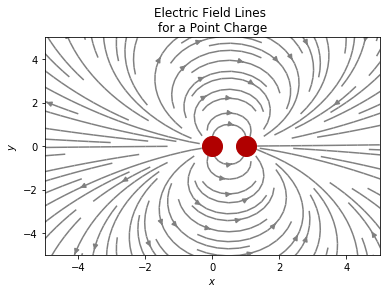

In [11]:
qr = []
qr.append((0.0, 0.0, 1.0))
qr.append((1.0, 0.0, -1.0))
Plots(qr, title = "Electric Field Lines \nfor a Point Charge")

#### 5) Let's add another charge of opposite sign to our plot. To do this, copy and paste the qr.append() line immediately after it. Change the values and observe how the plot changes. 

#### 6) In the cell below, write a) observations that you had about the physics of the above example, and b) any thoughts about the code for this example. The cell below is designated as a *Markdown* cell, please feel free to search the internet for Markdown formatting and use it if you like.

$$x^2$$

### A ball is dropped from a tower of height $h$ with an initial velocity of $0$ m/s. Get the height as a user input and calculate and print the time it takes for the ball to reach the ground, ignoring air resistance. 

In [12]:
h = input("height in m: ")
print("the height is", h, "meters")

height in m:  6.6


the height is 6.6 meters


## Now, some final notes about the Jupyter notebooks:
#### Jupyter notebook files are designated by the *.ipynb* extension.
#### We can download notebooks in other formats, but they will not be executable.
#### The notebooks run *locally* (on your computer) in a web browser.
#### When the notebook application is launched, a local notebook server runs.
#### For each notebook you open, an iPython *kernel* starts running.
#### The kernel does *not* stop running when the browser tab is closed.
#### Make sure to shutdown each kernel that you begin, either from the notebook itself or the dashboard.

## I hope you had fun working through this Jupyter notebook! 

#### 7) Please run everything as you would like me to see it, then go to File->Rename. 
#### 8) Save this file as lastname1_lastname2_jupyter.ipynb (you do not have to enter the extension if you don't see it) and submit on Moodle
#### 9) Only one member of the group needs to submit this file on Moodle.